In [1]:
import mm_2019_sss_1 as mm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
n_particles = [10, 100, 250, 500, 1000, 2500, 5000, 10000,20000]
n_steps = 50000
performance_steps = list()
for particles in n_particles:
    sim = mm.MC(method='random', num_particles=particles, reduced_den=0.9, reduced_temp=0.9, max_displacement=0.1, cutoff=3.0)
    sim.run(n_steps=n_steps, freq=n_steps)
    performance_steps.append(sim.performance)
performance_steps = np.array(performance_steps)

Step: 50000 | Energy: -2.8232
Performance: 0.20897 seconds / 1000 steps
Step: 50000 | Energy: -6.05182
Performance: 0.22529 seconds / 1000 steps
Step: 50000 | Energy: -6.11049
Performance: 0.27048 seconds / 1000 steps
Step: 50000 | Energy: -11.24698
Performance: 0.30851 seconds / 1000 steps
Step: 50000 | Energy: -4.53781
Performance: 0.37252 seconds / 1000 steps
Step: 50000 | Energy: 25.4
Performance: 0.61936 seconds / 1000 steps
Step: 50000 | Energy: 3414.9296
Performance: 0.85416 seconds / 1000 steps
Step: 50000 | Energy: 625494.81436
Performance: 1.41408 seconds / 1000 steps
Step: 50000 | Energy: 400855894.17914
Performance: 2.99169 seconds / 1000 steps


Text(0.5, 0, 'Number of particles')

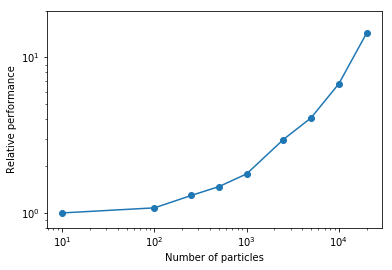

In [4]:
plt.loglog(n_particles, performance_steps / performance_steps[0], marker='o')
plt.ylim(0.8,20)
plt.ylabel("Relative performance")
plt.xlabel("Number of particles")